In [121]:
%matplotlib inline


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.activations import relu
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:

# Read in Bank Customer Chrun data

Customer_df = pd.read_csv('/content/drive/My Drive/Churn_Modelling.csv')


In [124]:

# Dropping the unique fields
Customer_df.drop(["RowNumber","Surname","CustomerId"],axis=1,inplace=True)


In [125]:


from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
#enc = OneHotEncoder(handle_unknown='ignore')

In [126]:

Customer_df['Gender'] = labelencoder.fit_transform(Customer_df['Gender'])


#X_train = enc.fit(X_train)

In [127]:
Customer_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [128]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

In [129]:
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(Customer_df[['Geography']]).toarray())
# merge with main df bridge_df on key values
Customer_df = Customer_df.join(enc_df)


In [130]:
Customer_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,0,1,2
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [131]:

# dropping Geography field which has been converted int ocategorical
Customer_df.drop(["Geography"],axis=1,inplace=True)

In [132]:


# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Splitting teh data into x and y
Y = Customer_df['Exited']
X=Customer_df.iloc[:,0:11]



# Split the data up in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)


In [133]:
# Standarization


#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


In [134]:
X_train.shape, X_test.shape

((7000, 11), (3000, 11))

Normalization of Data

In [135]:
#Normalization
from sklearn import preprocessing

# normalize the data attributes
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)


In [136]:
X_train.shape, X_test.shape

((7000, 11), (3000, 11))

In [137]:
# Convert data to NumPy array

# importing library
#import numpy 


# converting list to array

#X_train = numpy.asarray(X_train)
#X_test = numpy.asarray(X_test)

#Y_train = numpy.asarray(y_train)
#Y_test = numpy.asarray(y_test)


In [138]:

# Initialize the constructor
model = Sequential()

model.add(tf.keras.layers.Flatten())   

# Add an input layer 
model.add(Dense(11, activation ='relu'))
# Add more hidden layer 
model.add(Dense(9, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [139]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

Epoch 1/80
280/280 [==============================] - 1s 2ms/step - loss: 2.4744e-08 - accuracy: 0.7924 - val_loss: 2.3206e-08 - val_accuracy: 0.8053
Epoch 2/80
280/280 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.7924 - val_loss: 2.3206e-08 - val_accuracy: 0.8053
Epoch 3/80
280/280 [==============================] - 0s 2ms/step - loss: 2.4744e-08 - accuracy: 0.7924 - val_loss: 2.3206e-08 - val_accuracy: 0.8053
Epoch 4/80
280/280 [==============================] - 0s 1ms/step - loss: 2.4744e-08 - accuracy: 0.7924 - val_loss: 2.3206e-08 - val_accuracy: 0.8053
Epoch 5/80
280/280 [==============================] - 0s 1ms/step - loss: 2.4744e-08 - accuracy: 0.7924 - val_loss: 2.3206e-08 - val_accuracy: 0.8053
Epoch 6/80
280/280 [==============================] - 0s 1ms/step - loss: 2.4744e-08 - accuracy: 0.7924 - val_loss: 2.3206e-08 - val_accuracy: 0.8053
Epoch 7/80
280/280 [==============================] - 0s 1ms/step - loss: 2.4744e-08 - accuracy: 0.7

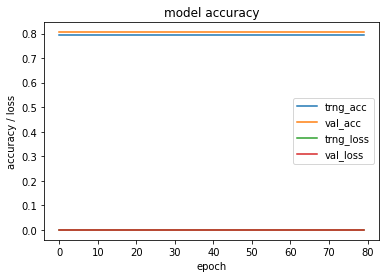

In [140]:
# Compile model
epochs = 80
lrate = 0.01

history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=25 )
loss,test_accuracy  = model.evaluate(X_test, Y_test, verbose=False)
print("model training accuracy :" , history.history['accuracy'])
print("model validation accuracy : ", history.history['val_accuracy'])
print("model test accuracy : ", test_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['trng_acc', 'val_acc' , 'trng_loss' , 'val_loss'], loc='best')
plt.show()



In [141]:
pred=model.predict(X_test)

In [142]:
pred

array([[0.49729303],
       [0.4949623 ],
       [0.4951054 ],
       ...,
       [0.4937214 ],
       [0.49507636],
       [0.497216  ]], dtype=float32)

Converting Prob Values to binary

In [143]:
ypred=[int(p>=0.5) for p in pred]

Classification report

In [144]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, ypred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      2416
           1       0.10      0.00      0.01       584

    accuracy                           0.80      3000
   macro avg       0.45      0.50      0.45      3000
weighted avg       0.67      0.80      0.72      3000



Confusion Matrx

In [145]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,ypred))

[[2397   19]
 [ 582    2]]


In [146]:
from sklearn.metrics import accuracy_score
print("Test Accuracy: ",accuracy_score(Y_test,ypred))

Test Accuracy:  0.7996666666666666
